In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/Colab_Notebooks/dataset/train'
test_dir = '/content/drive/MyDrive/Colab_Notebooks/dataset/test'
validation_dir = '/content/drive/MyDrive/Colab_Notebooks/dataset/validation'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Parameter dasar

In [ ]:
img_width, img_height = 224, 224
batch_size = 32
epochs = 30
num_classes = 4

# Data augmentation untuk set pelatihan

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescale saja untuk validasi dan pengujian

In [ ]:
val_test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Data generator untuk train, validation, dan test
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4188 images belonging to 4 classes.


In [ ]:
validation_generator = val_test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 86 images belonging to 4 classes.
Found 86 images belonging to 4 classes.


# Load VGG16 model tanpa fully connected layer atas

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Membekukan layer VGG16 agar tidak dilatih ulang
for layer in base_model.layers:
    layer.trainable = False

# Menambahkan lapisan fully connected baru
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Membuat model lengkap
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilasi model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab_Notebooks/best_corn_disease_model.keras', monitor='val_loss', save_best_only=True)

# Pelatihan model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


130/130 ━━━━━━━━━━━━━━━━━━━━ 1450s 10s/step - accuracy: 0.6690 - loss: 0.8319 - val_accuracy: 0.8906 - val_loss: 0.2653
Epoch 2/30
  1/130 ━━━━━━━━━━━━━━━━━━━━ 20s 162ms/step - accuracy: 0.6875 - loss: 0.6326

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


130/130 ━━━━━━━━━━━━━━━━━━━━ 19s 144ms/step - accuracy: 0.6875 - loss: 0.6326 - val_accuracy: 0.9545 - val_loss: 0.2298
Epoch 3/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 78s 571ms/step - accuracy: 0.8557 - loss: 0.3959 - val_accuracy: 0.9219 - val_loss: 0.1885
Epoch 4/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.8125 - loss: 0.4459 - val_accuracy: 0.9545 - val_loss: 0.1565
Epoch 5/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 75s 540ms/step - accuracy: 0.8543 - loss: 0.3609 - val_accuracy: 0.9375 - val_loss: 0.1689
Epoch 6/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8125 - loss: 0.4288 - val_accuracy: 1.0000 - val_loss: 0.0915
Epoch 7/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 79s 538ms/step - accuracy: 0.8708 - loss: 0.3195 - val_accuracy: 0.9062 - val_loss: 0.1564
Epoch 8/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8125 - loss: 0.3292 - val_accuracy: 0.8636 - val_loss: 0.1642
Epoch 9/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 83s 553ms/step - accuracy: 0.8826 - loss: 0.2994 - val_accura

# Evaluasi model pada set pengujian

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Akurasi pada data uji: {test_acc * 100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.9375 - loss: 0.1313
Akurasi pada data uji: 92.19%


# Plot akurasi dan loss

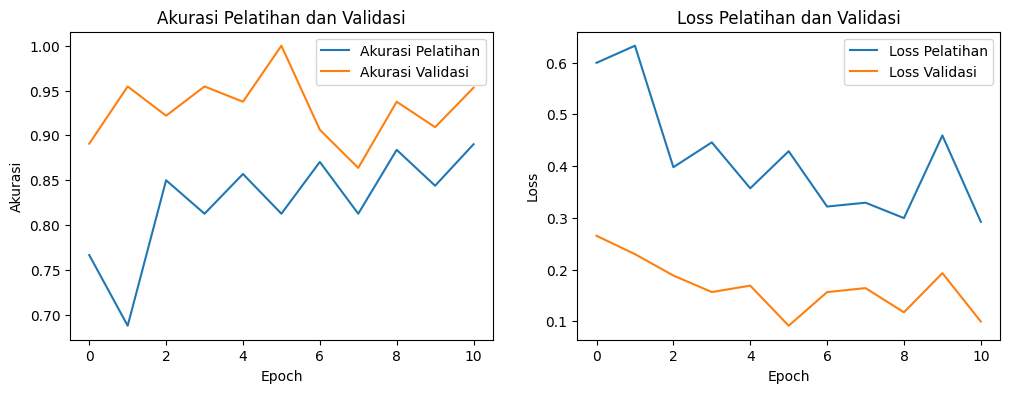

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.title('Akurasi Pelatihan dan Validasi')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Pelatihan dan Validasi')

plt.show()

# Test hasil train

In [22]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Path folder test
test_dir = '/content/drive/MyDrive/Colab_Notebooks/dataset/test'

# Load model terbaik
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/best_corn_disease_model.keras')
print("Model loaded successfully.")

# Daftar kelas penyakit (tentukan manual jika `train_generator` tidak tersedia)
class_labels = ['blight', 'common_rust', 'gray_leaf_spot', 'healthy']

# Fungsi untuk memprediksi satu gambar
def predict_image(image_path):
    print(f"Predicting for image: {image_path}")
    # Muat dan praproses gambar
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Lakukan prediksi
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return class_labels[predicted_class], prediction[0][predicted_class]

# Loop melalui semua subfolder dan gambar di dalam test_dir
for subdir, dirs, files in os.walk(test_dir):
    for filename in files:
        image_path = os.path.join(subdir, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            predicted_class, confidence = predict_image(image_path)
            print(f"Image: {filename} | Predicted class: {predicted_class} | Confidence: {confidence:.2f}")

Model loaded successfully.
Predicting for image: /content/drive/MyDrive/Colab_Notebooks/dataset/test/healthy/Corn_Health (91).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
Image: Corn_Health (91).jpg | Predicted class: healthy | Confidence: 1.00
Predicting for image: /content/drive/MyDrive/Colab_Notebooks/dataset/test/healthy/Corn_Health (88).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Image: Corn_Health (88).jpg | Predicted class: healthy | Confidence: 1.00
Predicting for image: /content/drive/MyDrive/Colab_Notebooks/dataset/test/healthy/Corn_Health (78).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Image: Corn_Health (78).jpg | Predicted class: healthy | Confidence: 0.99
Predicting for image: /content/drive/MyDrive/Colab_Notebooks/dataset/test/healthy/Corn_Health (79).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: Corn_Health (79).jpg | Predicted class: healthy | Confidence: 0.99
Predicting for image: /content/drive/MyDrive/Colab_Notebooks/dataset/test/healthy/Corn_Health (85).jpg
1/1 ━━━━━

# Testing manual

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import tensorflow as tf
from google.colab import files
from IPython.display import display, Image

# Load model terbaik
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/best_corn_disease_model.keras')
class_labels = ['blight', 'common_rust', 'gray_leaf_spot', 'healthy']

# Fungsi untuk memprediksi gambar
def predict_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    confidence = prediction[0][predicted_class]
    return class_labels[predicted_class], confidence

uploaded = files.upload()

for file_name in uploaded.keys():
    print(f"Predicting for image: {file_name}")
    predicted_class, confidence = predict_image(file_name)
    print(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}")
    display(Image(filename=file_name))

# Save model to .h5

In [26]:
import tensorflow as tf

# Muat model dengan format .keras
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/best_corn_disease_model.keras')

# Simpan model dalam format .h5
model.save('/content/drive/MyDrive/Colab_Notebooks/best_corn_disease_model.h5', save_format='h5')

print("Model telah disimpan dalam format .h5.")

Model telah disimpan dalam format .h5.


# Save model to tflite

In [27]:
import tensorflow as tf

# Muat model dengan format .keras
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/best_corn_disease_model.keras')

# Konversi model ke TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model TensorFlow Lite ke file .tflite
with open('/content/drive/MyDrive/Colab_Notebooks/best_corn_disease_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model telah disimpan dalam format .tflite.")

Saved artifact at '/tmp/tmpl7vhi860'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  133417278164128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133414501113120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133414501106080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133414501115760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133414501111712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133414501117696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133414501116288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133414501119808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133414501106608: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133414501106432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133414501113648

# Save model to tfjs

In [28]:
pip install tensorflowjs

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 107.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
  Attempting uninstall: tensorboard
    Found existing installation: 

In [3]:
import tensorflowjs as tfjs
import tensorflow as tf

# Muat model dengan format .keras
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/best_corn_disease_model.keras')

# Simpan model sebagai TensorFlow.js
tfjs.converters.save_keras_model(model, '/content/drive/MyDrive/Colab_Notebooks/tfjs_model')

print("Model telah disimpan dalam format TensorFlow.js di folder 'tfjs_model'.")

failed to lookup keras version from the file,
    this is likely a weight only file
Model telah disimpan dalam format TensorFlow.js di folder 'tfjs_model'.
